## Content list

#### 1. Import libraries
#### 2. Import data
#### 3.1. Random Forest data prep (2011 - 2020 data)
#### 3.2. Random Forest (2011 - 2020 data)
#### 3.3. Feature Importance - Random Forest (2011 - 2020 data)
#### 4.1. Random Forest data prep (Madrid)
#### 4.2. Random Forest (Madrid data)
#### 4.3. Feature Importance - Random Forest (Madrid data)
#### 5.1. Random Forest data prep (Budapest)
#### 5.2. Random Forest (Budapest data)
#### 5.3. Feature Importance - Random Forest (Budapest data)
#### 6.1. Random Forest data prep (Ljubljana)
#### 6.2. Random Forest (Ljubljana data)
#### 6.3. Feature Importance - Random Forest (Ljubljana data)

## 1. Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from numpy import argmax

## 2. Import data

In [2]:
# Turn project folder path into a string
path = r'C:\Users\Admin\Desktop\Data Analysis\Maching Learning\Climate_Win'

In [3]:
path

'C:\\Users\\Admin\\Desktop\\Data Analysis\\Maching Learning\\Climate_Win'

In [13]:
# Import cleaned weather data
df_cw = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'climatewin_cleaned.csv'))

In [14]:
# Check output
df_cw.head()

BASEL_cloud_cover  BASEL_global_radiation  BASEL_humidity  \
0                  7                    0.32            0.85   
1                  6                    0.36            0.84   
2                  8                    0.18            0.90   
3                  3                    0.58            0.92   
4                  6                    0.65            0.95   

   BASEL_precipitation  BASEL_pressure  BASEL_sunshine  BASEL_temp_max  \
0                 0.09           1.018             0.7            10.9   
1                 1.05           1.018             1.1            10.1   
2                 0.30           1.018             0.0             9.9   
3                 0.00           1.018             4.1            10.6   
4                 0.14           1.018             5.4             6.0   

   BASEL_temp_mean  BASEL_temp_min  BELGRADE_cloud_cover  ...  \
0              6.5             0.8                     1  ...   
1              6.1             3.3                     6  ...   
2              8.5             5.1                     6  ...   
3              6.3             3.8                     8  ...   
4              3.0            -0.7                     8  ...   

   STOCKHOLM_temp_min  VALENTIA_cloud_cover  VALENTIA_global_radiation  \
0                 2.2                     5                       0.45   
1                 3.0                     7                       0.25   
2                 1.3                     7                       0.17   
3                 0.4                     7                       0.13   
4                 0.8                     3                       0.46   

   VALENTIA_humidity  VALENTIA_precipitation  VALENTIA_pressure  \
0               0.88                    0.34             1.0003   
1               0.91                    0.84             1.0007   
2               0.91                    0.08             1.0096   
3               0.86                    0.98             1.0184   
4               0.80                    0.00             1.0328   

   VALENTIA_sunshine  VALENTIA_temp_max  VALENTIA_temp_mean  VALENTIA_temp_min  
0                4.7               10.9                 8.5                6.0  
1                0.7               12.1                 8.9                5.6  
2                0.1               12.9                10.5                8.1  
3                0.0               10.6                 7.4                7.3  
4                5.7                8.4                 5.7                3.0  

[5 rows x 135 columns]

In [15]:
# Check shape
df_cw.shape

(22950, 135)

In [21]:
# Import climatewin prediction data
df_cw_pred = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [22]:
# Check output
df_cw_pred.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  19600101                       0                          0   
1  19600102                       0                          0   
2  19600103                       0                          0   
3  19600104                       0                          0   
4  19600105                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [9]:
# Check shape
df_cw_pred.shape

(22950, 15)

In [16]:
# Import original weather data
df_cw_original = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Dataset-weather-prediction-dataset-processed.csv'))

In [17]:
# Check output
df_cw_original.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0  19600101      1                  7               2.1            0.85   
1  19600102      1                  6               2.1            0.84   
2  19600103      1                  8               2.1            0.90   
3  19600104      1                  3               2.1            0.92   
4  19600105      1                  6               2.1            0.95   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0           1.018                    0.32                 0.09   
1           1.018                    0.36                 1.05   
2           1.018                    0.18                 0.30   
3           1.018                    0.58                 0.00   
4           1.018                    0.65                 0.14   

   BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_cloud_cover  \
0                 0             0.7  ...                     5   
1                 0             1.1  ...                     7   
2                 0             0.0  ...                     7   
3                 0             4.1  ...                     7   
4                 0             5.4  ...                     3   

   VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0               0.88             1.0003                       0.45   
1               0.91             1.0007                       0.25   
2               0.91             1.0096                       0.17   
3               0.86             1.0184                       0.13   
4               0.80             1.0328                       0.46   

   VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
0                    0.34                    0                4.7   
1                    0.84                    0                0.7   
2                    0.08                    0                0.1   
3                    0.98                    0                0.0   
4                    0.00                    0                5.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                 8.5                6.0               10.9  
1                 8.9                5.6               12.1  
2                10.5                8.1               12.9  
3                 7.4                7.3               10.6  
4                 5.7                3.0                8.4  

[5 rows x 170 columns]

In [18]:
# Check shape
df_cw_original.shape

(22950, 170)

## 3.1. Random Forest data prep (2011 - 2020 data)

In [19]:
# Combine date from original data and cleaned data
df_cw_date = pd.concat([df_cw_original['DATE'],df_cw], axis=1)
df_cw_date

DATE  BASEL_cloud_cover  BASEL_global_radiation  BASEL_humidity  \
0      19600101                  7                    0.32            0.85   
1      19600102                  6                    0.36            0.84   
2      19600103                  8                    0.18            0.90   
3      19600104                  3                    0.58            0.92   
4      19600105                  6                    0.65            0.95   
...         ...                ...                     ...             ...   
22945  20221027                  1                    1.34            0.79   
22946  20221028                  6                    1.34            0.77   
22947  20221029                  4                    1.34            0.76   
22948  20221030                  5                    1.34            0.80   
22949  20221031                  5                    1.34            0.84   

       BASEL_precipitation  BASEL_pressure  BASEL_sunshine  BASEL_temp_max  \
0                     0.09          1.0180             0.7            10.9   
1                     1.05          1.0180             1.1            10.1   
2                     0.30          1.0180             0.0             9.9   
3                     0.00          1.0180             4.1            10.6   
4                     0.14          1.0180             5.4             6.0   
...                    ...             ...             ...             ...   
22945                 0.22          1.0248             7.7            21.4   
22946                 0.22          1.0244             5.4            21.9   
22947                 0.22          1.0227             6.1            22.4   
22948                 0.22          1.0212             5.8            21.1   
22949                 0.22          1.0193             3.2            19.2   

       BASEL_temp_mean  BASEL_temp_min  ...  STOCKHOLM_temp_min  \
0                  6.5             0.8  ...                 2.2   
1                  6.1             3.3  ...                 3.0   
2                  8.5             5.1  ...                 1.3   
3                  6.3             3.8  ...                 0.4   
4                  3.0            -0.7  ...                 0.8   
...                ...             ...  ...                 ...   
22945             15.9            11.4  ...                 8.2   
22946             16.7            14.3  ...                11.0   
22947             16.7            13.1  ...                12.1   
22948             15.4            11.6  ...                 5.1   
22949             13.5             9.9  ...                 5.0   

       VALENTIA_cloud_cover  VALENTIA_global_radiation  VALENTIA_humidity  \
0                         5                       0.45               0.88   
1                         7                       0.25               0.91   
2                         7                       0.17               0.91   
3                         7                       0.13               0.86   
4                         3                       0.46               0.80   
...                     ...                        ...                ...   
22945                     5                       1.13               0.82   
22946                     5                       1.13               0.82   
22947                     5                       1.13               0.82   
22948                     5                       1.13               0.82   
22949                     5                       1.13               0.82   

       VALENTIA_precipitation  VALENTIA_pressure  VALENTIA_sunshine  \
0                        0.34             1.0003                4.7   
1                        0.84             1.0007                0.7   
2                        0.08             1.0096                0.1   
3                        0.98             1.0184                0.0   
4                        0.00             1.0328    

In [20]:
# Check shape
df_cw_date.shape

(22950, 136)

In [32]:
# Filter weather dataset to 2011 to 2020
df_2010s = df_cw_date.loc[df_cw_date['DATE'].astype(str).str[:4].isin(['2020','2019','2018','2017','2016','2015','2014','2013','2012','2011'])]
df_2010s

DATE  BASEL_cloud_cover  BASEL_global_radiation  BASEL_humidity  \
18628  20110101                  8                    0.13            0.97   
18629  20110102                  8                    0.13            0.94   
18630  20110103                  4                    0.64            0.93   
18631  20110104                  6                    0.38            0.89   
18632  20110105                  5                    0.64            0.79   
...         ...                ...                     ...             ...   
22276  20201227                  8                    0.26            0.70   
22277  20201228                  7                    0.26            0.74   
22278  20201229                  6                    0.25            0.74   
22279  20201230                  6                    0.32            0.85   
22280  20201231                  7                    0.21            0.86   

       BASEL_precipitation  BASEL_pressure  BASEL_sunshine  BASEL_temp_max  \
18628                 0.00          1.0232             0.0             0.3   
18629                 0.00          1.0234             0.0             1.4   
18630                 0.00          1.0254             6.1            -0.9   
18631                 0.00          1.0208             1.0            -1.9   
18632                 0.06          1.0142             6.5             2.5   
...                    ...             ...             ...             ...   
22276                 0.41          1.0007             0.0             9.9   
22277                 0.11          0.9828             0.4             8.1   
22278                 0.22          0.9945             0.2             6.9   
22279                 0.04          1.0069             0.3             4.9   
22280                 0.71          1.0069             0.0             4.8   

       BASEL_temp_mean  BASEL_temp_min  ...  STOCKHOLM_temp_min  \
18628             -0.2            -0.8  ...                -4.2   
18629             -0.2            -3.9  ...                -6.0   
18630             -3.3            -5.2  ...                -9.5   
18631             -3.6            -5.8  ...                -9.0   
18632             -0.8            -5.4  ...                -5.6   
...                ...             ...  ...                 ...   
22276              1.7            -3.6  ...                 0.3   
22277              4.6             1.9  ...                 3.4   
22278              4.4             1.6  ...                 2.7   
22279              2.6             0.5  ...                 1.1   
22280              1.9            -1.2  ...                 2.5   

       VALENTIA_cloud_cover  VALENTIA_global_radiation  VALENTIA_humidity  \
18628                     5                       0.13               0.82   
18629                     5                       0.15               0.82   
18630                     5                       0.17               0.82   
18631                     5                       0.22               0.82   
18632                     5                       0.23               0.82   
...                     ...                        ...                ...   
22276                     5                       1.13               0.82   
22277                     5                       1.13               0.82   
22278                     5                       1.13               0.82   
22279                     5                       1.13               0.82   
22280                     5                       1.13               0.82   

       VALENTIA_precipitation  VALENTIA_pressure  VALENTIA_sunshine  \
18628                    0.41             1.0142                3.4   
18629                    0.41             1.0142                3.4   
18630                    0.41             1.0142                3.4   
18631                    0.41             1.0142                3.4   
18632                    0.41             1.0142    

In [33]:
# Filter prediction dataset to 2011 to 2020
df_pred_2010s = df_cw_pred.loc[df_cw_pred['DATE'].astype(str).str[:4].isin(['2020','2019','2018','2017','2016','2015','2014','2013','2012','2011'])] 
df_pred_2010s

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
18628  20110101                       0                          0   
18629  20110102                       0                          0   
18630  20110103                       0                          0   
18631  20110104                       0                          0   
18632  20110105                       0                          0   
...         ...                     ...                        ...   
22276  20201227                       0                          0   
22277  20201228                       0                          0   
22278  20201229                       0                          0   
22279  20201230                       0                          0   
22280  20201231                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
18628                          0                        0   
18629                          0                        0   
18630                          0                        0   
18631                          0                        0   
18632                          0                        0   
...                          ...                      ...   
22276                          0                        0   
22277                          0                        0   
22278                          0                        0   
22279                          0                        0   
22280                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
18628                            0                          0   
18629                            0                          0   
18630                            0                          0   
18631                            0                          0   
18632                            0                          0   
...                            ...                        ...   
22276                            0                          0   
22277                            0                          0   
22278                            0                          0   
22279                            0                          0   
22280                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
18628                        0                           0   
18629                        0                           0   
18630                        0                           0   
18631                        0                           0   
18632                        0                           0   
...                        ...                         ...   
22276                        0                           0   
22277                        0                           0   
22278                        0                           0   
22279                        0                           0   
22280                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
18628                            0                        0   
18629                            0                        0   
18630                            0                        0   
18631                            0                        0   
18632                            0                        0   
...                            ...                      ...   
22276                            0                        0   
22277                            0                        0   
22278                            0                        0   
22279                            0                        0   
22280                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
18628                          0                      0   
18629                          0    

In [35]:
# Drop 'DATE' columns from 2020 weather dataset
df_2010s_nodate = df_2010s.drop(columns=['DATE'])

# Check output
df_2010s_nodate

BASEL_cloud_cover  BASEL_global_radiation  BASEL_humidity  \
18628                  8                    0.13            0.97   
18629                  8                    0.13            0.94   
18630                  4                    0.64            0.93   
18631                  6                    0.38            0.89   
18632                  5                    0.64            0.79   
...                  ...                     ...             ...   
22276                  8                    0.26            0.70   
22277                  7                    0.26            0.74   
22278                  6                    0.25            0.74   
22279                  6                    0.32            0.85   
22280                  7                    0.21            0.86   

       BASEL_precipitation  BASEL_pressure  BASEL_sunshine  BASEL_temp_max  \
18628                 0.00          1.0232             0.0             0.3   
18629                 0.00          1.0234             0.0             1.4   
18630                 0.00          1.0254             6.1            -0.9   
18631                 0.00          1.0208             1.0            -1.9   
18632                 0.06          1.0142             6.5             2.5   
...                    ...             ...             ...             ...   
22276                 0.41          1.0007             0.0             9.9   
22277                 0.11          0.9828             0.4             8.1   
22278                 0.22          0.9945             0.2             6.9   
22279                 0.04          1.0069             0.3             4.9   
22280                 0.71          1.0069             0.0             4.8   

       BASEL_temp_mean  BASEL_temp_min  BELGRADE_cloud_cover  ...  \
18628             -0.2            -0.8                     4  ...   
18629             -0.2            -3.9                     8  ...   
18630             -3.3            -5.2                     7  ...   
18631             -3.6            -5.8                     4  ...   
18632             -0.8            -5.4                     1  ...   
...                ...             ...                   ...  ...   
22276              1.7            -3.6                     7  ...   
22277              4.6             1.9                     4  ...   
22278              4.4             1.6                     2  ...   
22279              2.6             0.5                     7  ...   
22280              1.9            -1.2                     7  ...   

       STOCKHOLM_temp_min  VALENTIA_cloud_cover  VALENTIA_global_radiation  \
18628                -4.2                     5                       0.13   
18629                -6.0                     5                       0.15   
18630                -9.5                     5                       0.17   
18631                -9.0                     5                       0.22   
18632                -5.6                     5                       0.23   
...                   ...                   ...                        ...   
22276                 0.3                     5                       1.13   
22277                 3.4                     5                       1.13   
22278                 2.7                     5                       1.13   
22279                 1.1                     5                       1.13   
22280                 2.5                     5                       1.13   

       VALENTIA_humidity  VALENTIA_precipitation  VALENTIA_pressure  \
18628               0.82                    0.41             1.0142   
18629               0.82                    0.41             1.0142   
18630               0.82                    0.41             1.0142   
18631               0.82                    0.41             1.0142   
18632               0.82                    0.41             1.0142   
...                  ...                     ...             

In [37]:
# Drop 'DATE' columns from 2020 prediction dataset
df_pred_2010s_nodate = df_pred_2010s.drop(columns=['DATE'])

# Check output
df_pred_2010s_nodate

BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
18628                       0                          0   
18629                       0                          0   
18630                       0                          0   
18631                       0                          0   
18632                       0                          0   
...                       ...                        ...   
22276                       0                          0   
22277                       0                          0   
22278                       0                          0   
22279                       0                          0   
22280                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
18628                          0                        0   
18629                          0                        0   
18630                          0                        0   
18631                          0                        0   
18632                          0                        0   
...                          ...                      ...   
22276                          0                        0   
22277                          0                        0   
22278                          0                        0   
22279                          0                        0   
22280                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
18628                            0                          0   
18629                            0                          0   
18630                            0                          0   
18631                            0                          0   
18632                            0                          0   
...                            ...                        ...   
22276                            0                          0   
22277                            0                          0   
22278                            0                          0   
22279                            0                          0   
22280                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
18628                        0                           0   
18629                        0                           0   
18630                        0                           0   
18631                        0                           0   
18632                        0                           0   
...                        ...                         ...   
22276                        0                           0   
22277                        0                           0   
22278                        0                           0   
22279                        0                           0   
22280                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
18628                            0                        0   
18629                            0                        0   
18630                            0                        0   
18631                            0                        0   
18632                            0                        0   
...                            ...                      ...   
22276                            0                        0   
22277                            0                        0   
22278                            0                        0   
22279                            0                        0   
22280                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
18628                          0                      0   
18629                          0                      0   
18630                          0                      0   
18631                          0  

In [38]:
# Create matrices -- combine 15 columns in pleasant weather data into single column
y = df_pred_2010s_nodate.max(axis=1)
print("Shape of y_combined:", y.shape)

Shape of y_combined: (3653,)


In [39]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_combined:", y.unique())

Unique values in y_combined: [0 1]


In [40]:
# Ensure y has the correct shape
y = y.to_numpy().reshape(-1)

In [41]:
# Check y shape
y.shape

(3653,)

In [42]:
# Create X matrix
X = df_2010s_nodate.to_numpy()

In [43]:
# Check shapes
print(X.shape)
print(y.shape)

(3653, 135)
(3653,)


In [44]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [45]:
# Check shapes
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 135) (2739,)
(914, 135) (914,)


## 3.2. Random Forest (2011 - 2020 data)

In [46]:
# Creating a Random Forest classifier
clf_2010s = RandomForestClassifier(n_estimators = 100, max_depth=10)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_2010s.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [48]:
# Perform the predictions on the test dataset
y_pred = clf_2010s.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.973741794310722


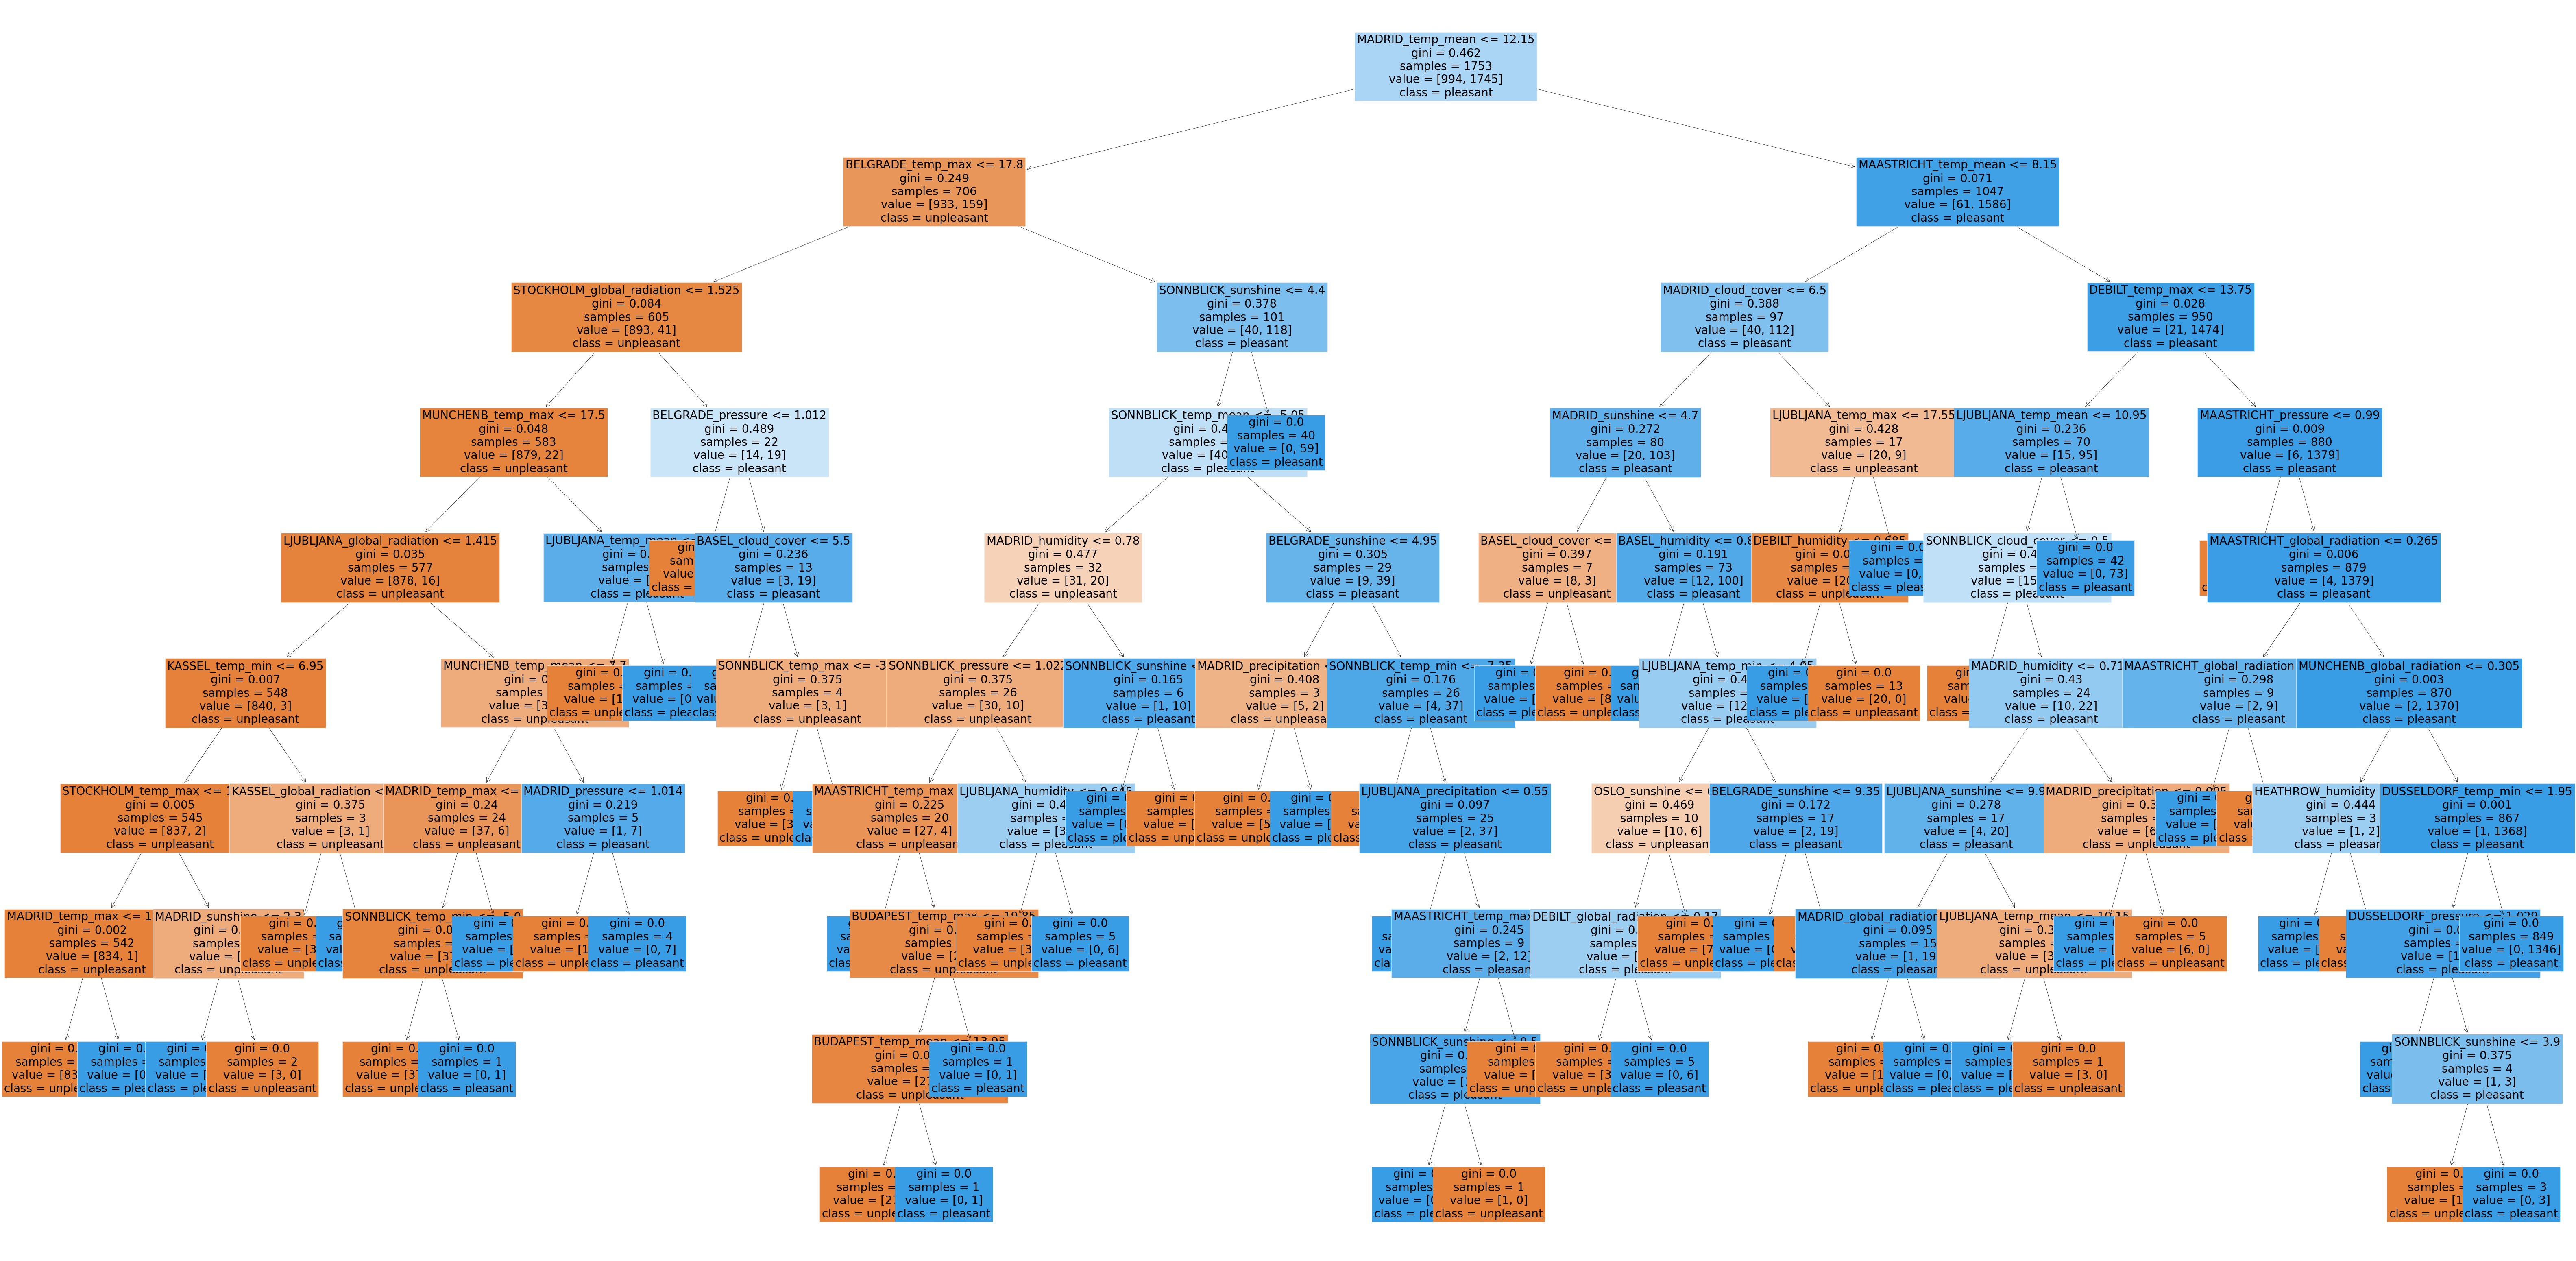

In [63]:
# Plot random forest (2011 - 2020) - Tree 1
rf_2010s_1 = plt.figure(figsize=(80,40))
plot_tree(clf_2010s.estimators_[5], fontsize = 20, feature_names=df_2010s_nodate.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [64]:
# Save random forest (2011 - 2022) - tree 1 visualization
rf_2010s_1.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'random_forest_2011to2020.png'),bbox_inches='tight')

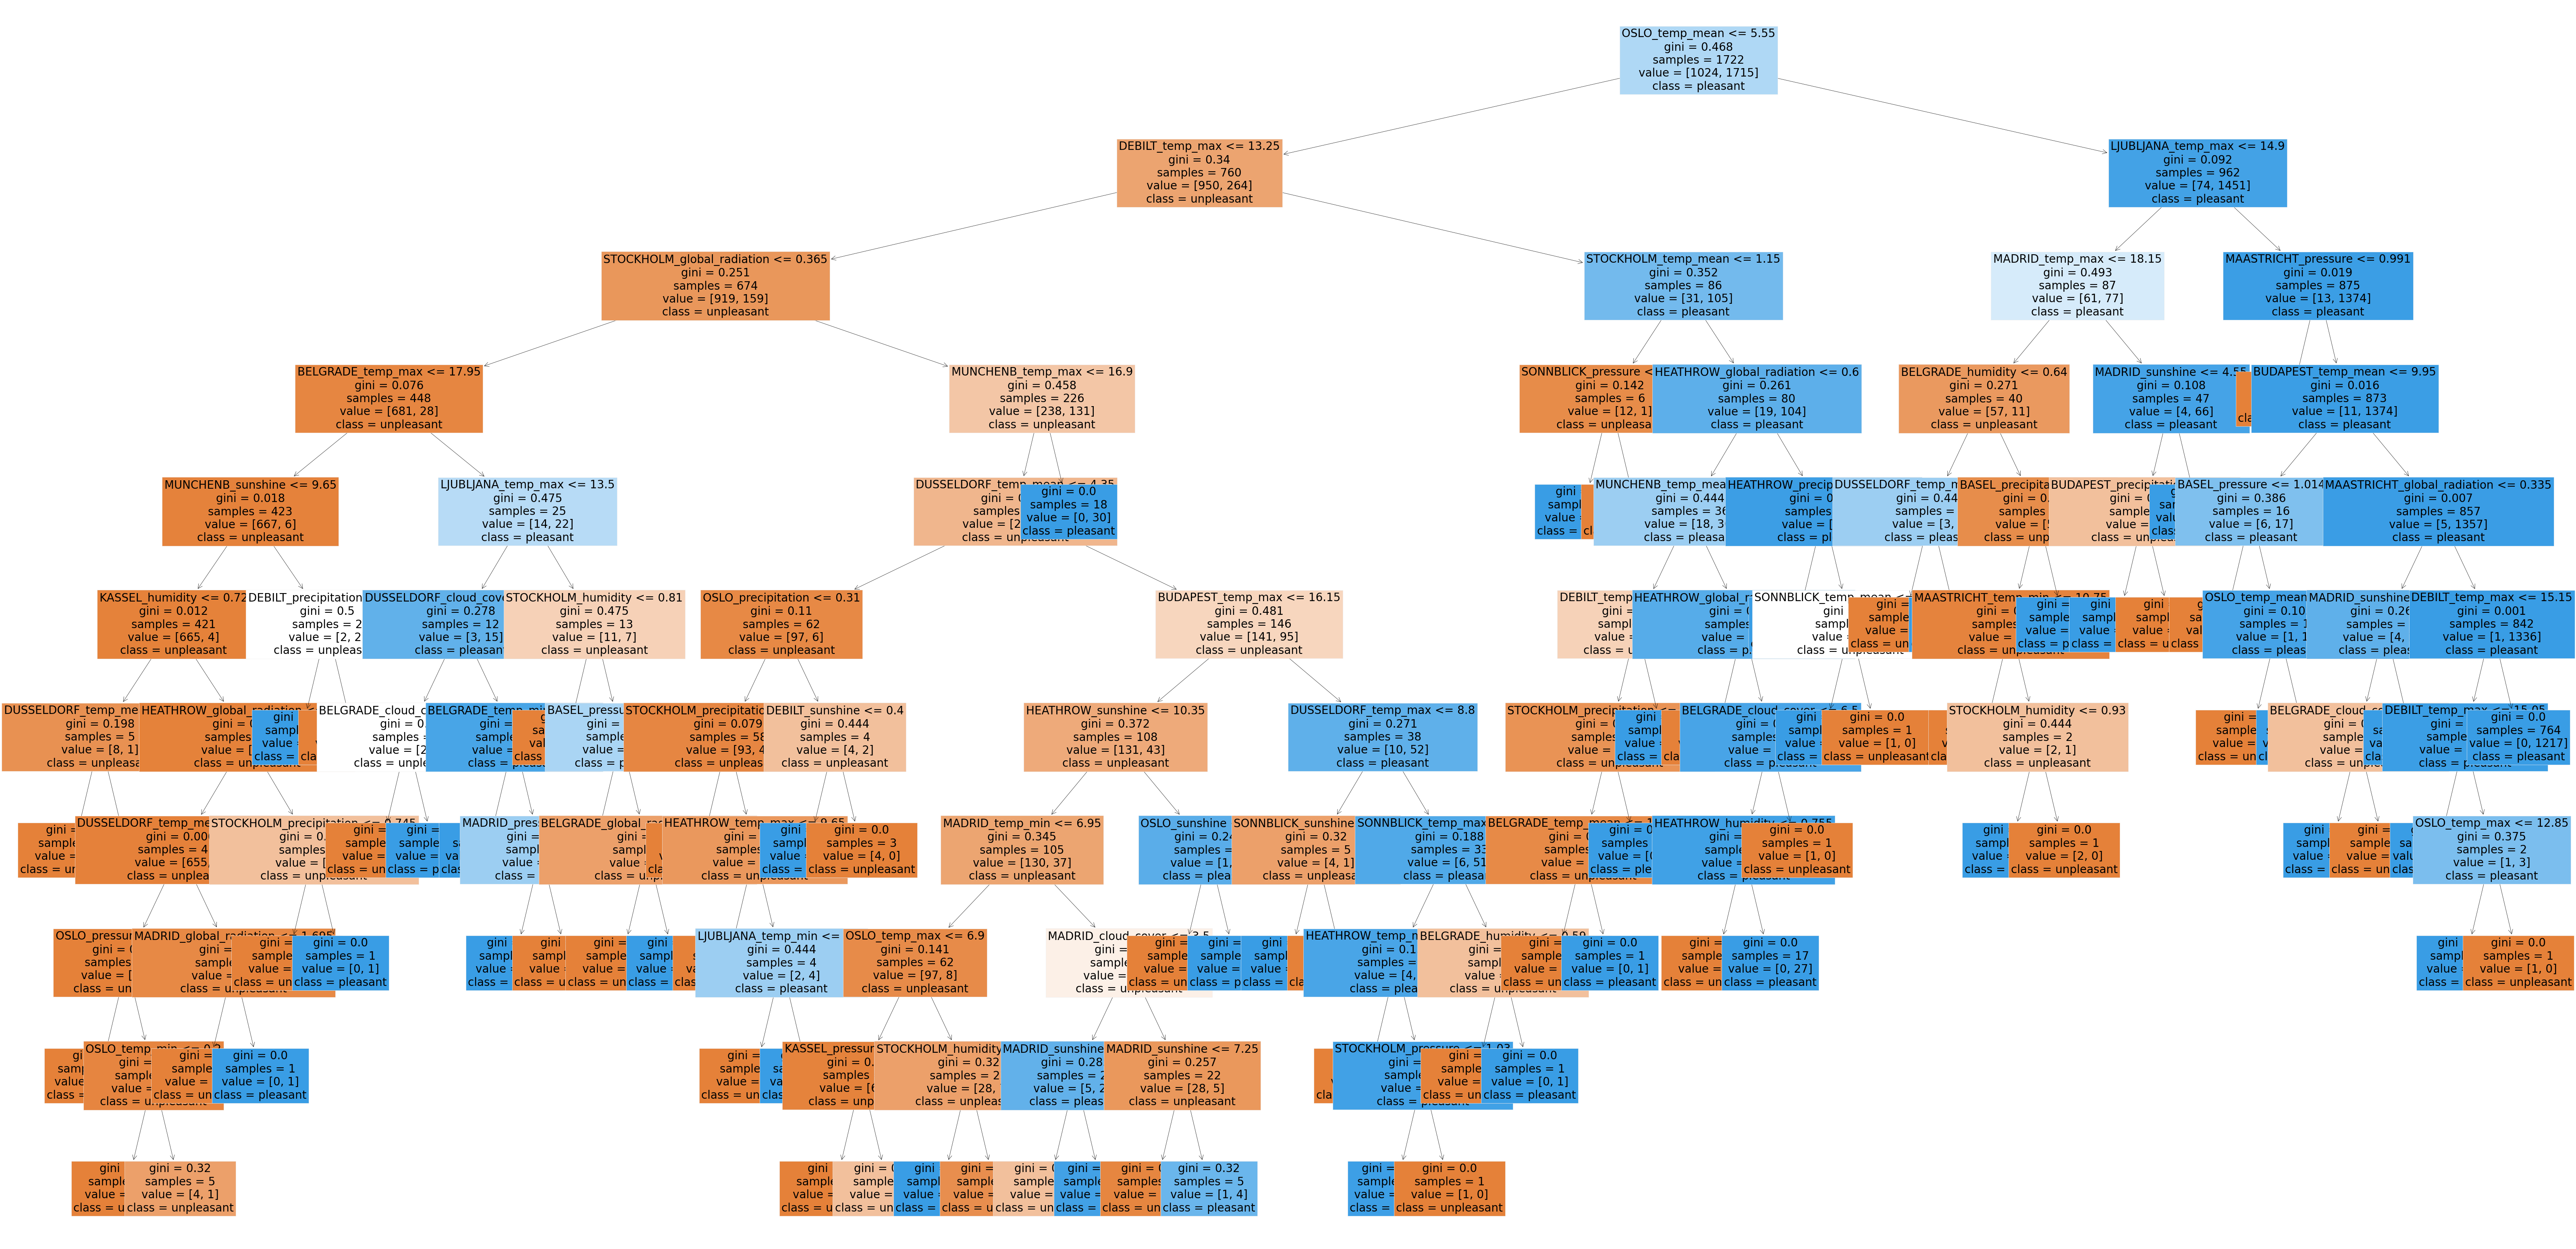

In [62]:
# Plot random forest (2011 - 2020) - Tree 2
rf_2010s_2 = plt.figure(figsize=(80,40))
plot_tree(clf_2010s.estimators_[15], fontsize = 20, feature_names=df_2010s_nodate.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [65]:
# Save random forest (2011 - 2022) - tree 2 visualization
rf_2010s_2.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'random_forest_2_2011to2020.png'),bbox_inches='tight')

## 3.3. Feature Importance - Random Forest (2011 - 2020 data)

In [52]:
# Retrieve feature importances from the trained model
feature_importances_2010s = clf_2010s.feature_importances_
print("Feature Importances:", feature_importances_2010s)
print(feature_importances_2010s.shape)

Feature Importances: [7.47110671e-04 3.19697749e-03 8.98798589e-04 5.49303770e-04
 1.35870606e-03 1.07060751e-03 2.74561445e-02 4.08685958e-02
 6.68936495e-03 1.33314324e-03 8.19738623e-04 1.98750062e-03
 2.10455076e-03 1.60415191e-03 9.54210665e-04 1.60505959e-02
 2.16610239e-02 1.26232507e-02 0.00000000e+00 8.29459286e-04
 0.00000000e+00 1.12965749e-03 0.00000000e+00 4.50865308e-04
 7.02445423e-02 7.85384088e-02 9.70752117e-03 6.42760179e-04
 1.24838501e-02 9.27603608e-04 4.82149376e-04 1.48625226e-03
 1.01368099e-03 2.00028170e-02 2.30274806e-03 1.30874563e-03
 3.89014576e-04 1.30682861e-03 1.16632232e-03 6.87974109e-04
 1.12971576e-03 1.08160510e-03 1.80892245e-02 3.71556137e-03
 1.24164760e-03 8.24251089e-04 9.49147429e-03 2.10367728e-03
 1.16648601e-03 1.65312255e-03 1.34359147e-03 2.97704003e-02
 1.84440907e-02 2.16016371e-03 3.63067358e-04 5.60894651e-04
 4.50796590e-04 1.77385781e-04 6.29089850e-04 2.97009855e-04
 8.72375887e-04 4.00423338e-04 5.18091966e-04 7.68603279e-04
 3.

In [53]:
# Reshape the feature importances to (-1, 15, 9)
reshaped_importances_2010s = feature_importances_2010s.reshape(-1, 15, 9)

# Check shape
print("Reshaped Importances Shape:", reshaped_importances_2010s.shape)

Reshaped Importances Shape: (1, 15, 9)


In [54]:
# Sum the values across the last dimension to get one observation for each weather station
collapsed_importances_2010s = np.sum(reshaped_importances_2010s[0], axis=1)

# Check shape
print("Collapsed Importances Shape:", collapsed_importances_2010s.shape)
print("Collapsed Importances:", collapsed_importances_2010s)

Collapsed Importances Shape: (15,)
Collapsed Importances: [0.08283561 0.05913817 0.16090045 0.04065061 0.02880789 0.06695726
 0.00426914 0.12596719 0.05986156 0.20940381 0.0574652  0.0630389
 0.00992724 0.02890022 0.00187677]


In [55]:
# Create list for weather stations
weather_stations = ['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 
                    'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 
                    'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']

In [56]:
# Create a dataframe to associate weather stations with their importances
collapsed_importances_2010s = pd.DataFrame({
    'Weather Station': weather_stations,
    'Importance': collapsed_importances_2010s
})

In [57]:
# Sort by importance for chart readability
collapsed_importances_2010s = collapsed_importances_2010s.sort_values(by='Importance', ascending=False)
print("Collapsed Feature Importances:")
print(collapsed_importances_2010s)

Collapsed Feature Importances:
   Weather Station  Importance
9           MADRID    0.209404
2         BUDAPEST    0.160900
7        LJUBLJANA    0.125967
0            BASEL    0.082836
5         HEATHROW    0.066957
11            OSLO    0.063039
8       MAASTRICHT    0.059862
1         BELGRADE    0.059138
10        MUNCHENB    0.057465
3           DEBILT    0.040651
13       STOCKHOLM    0.028900
4       DUSSELDORF    0.028808
12       SONNBLICK    0.009927
6           KASSEL    0.004269
14        VALENTIA    0.001877


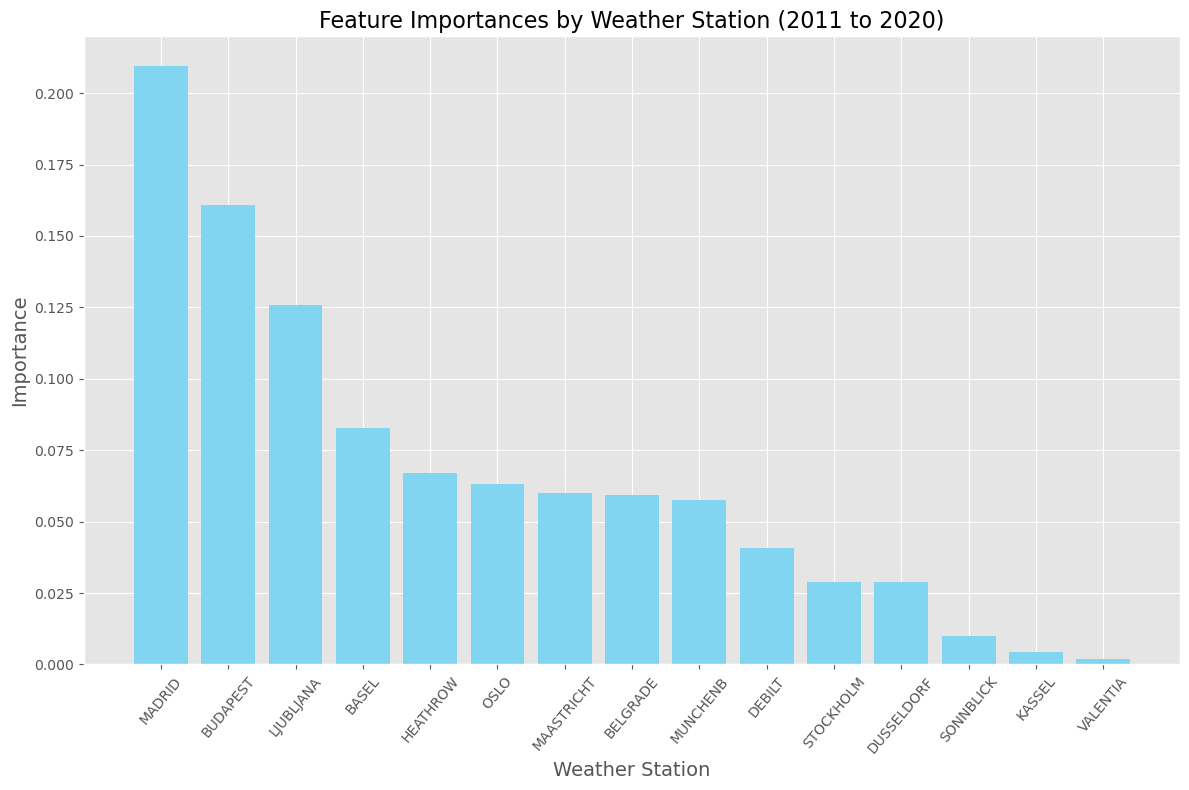

In [59]:
# Plot the importances

plt.style.use('ggplot')
plt_1 = plt.figure(figsize=(12, 8))
plt.bar(collapsed_importances_2010s['Weather Station'], collapsed_importances_2010s['Importance'], color='#81d5f0')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Weather Station', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importances by Weather Station (2011 to 2020)', fontsize=16)
plt.tight_layout()
plt.show();

In [60]:
# Save chart
plt_1.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'feature_importances_2011to2020.png'),bbox_inches='tight')

## 4.1. Random Forest data prep (Madrid)

In [74]:
# Filter weather dataset to only include Madrid
df_madrid = df_cw_date[df_cw_date.columns[df_cw_date.columns.astype(str).str.startswith('MADRID')]]
df_madrid

MADRID_cloud_cover  MADRID_global_radiation  MADRID_humidity  \
0                       6                     0.53             0.92   
1                       7                     0.46             0.86   
2                       5                     0.63             0.90   
3                       0                     1.16             0.75   
4                       2                     1.10             0.64   
...                   ...                      ...              ...   
22945                   8                     1.89             0.52   
22946                   8                     1.89             0.51   
22947                   8                     1.89             0.46   
22948                   5                     1.89             0.66   
22949                   8                     1.89             0.82   

       MADRID_precipitation  MADRID_pressure  MADRID_sunshine  \
0                      0.00           1.0260              1.4   
1                      0.00           1.0254              0.9   
2                      0.00           1.0287              2.3   
3                      0.00           1.0281              8.7   
4                      0.00           1.0269              7.8   
...                     ...              ...              ...   
22945                  0.12           1.0204              5.3   
22946                  0.12           1.0221              3.9   
22947                  0.12           1.0186              8.1   
22948                  0.12           1.0186              3.1   
22949                  0.12           1.0188              0.0   

       MADRID_temp_max  MADRID_temp_mean  MADRID_temp_min  
0                 10.8               7.6              4.4  
1                 12.2               9.8              7.4  
2                 10.8               8.6              6.4  
3                 16.1              10.3              4.5  
4                 16.0              12.1              8.2  
...                ...               ...              ...  
22945             23.9              20.0             16.2  
22946             23.5              19.1             14.7  
22947             22.6              19.0             15.4  
22948             18.3              15.7             13.1  
22949             16.1              14.1             12.1  

[22950 rows x 9 columns]

In [75]:
# Filter prediction dataset to only include Madrid
df_pred_madrid = df_cw_pred[df_cw_pred.columns[df_cw_pred.columns.astype(str).str.startswith('MADRID')]]
df_pred_madrid

MADRID_pleasant_weather
0                            0
1                            0
2                            0
3                            0
4                            0
...                        ...
22945                        0
22946                        0
22947                        0
22948                        0
22949                        0

[22950 rows x 1 columns]

In [76]:
# Check shape
print(df_madrid.shape)
print(df_pred_madrid.shape)

(22950, 9)
(22950, 1)


In [77]:
# Create matrices
y_1 = df_pred_madrid.max(axis=1)

# Check shape
print("Shape of y_1_combined:", y_1.shape)

Shape of y_1_combined: (22950,)


In [78]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_1_combined:", y_1.unique())

Unique values in y_1_combined: [0 1]


In [79]:
# Ensure y has the correct shape
y_1 = y_1.to_numpy().reshape(-1)

# Check shape
print(y_1.shape)

(22950,)


In [80]:
# Create X matrix
X_1 = df_madrid.to_numpy()

In [81]:
# Check shapes of the matrices
print(X_1.shape)
print(y_1.shape)

(22950, 9)
(22950,)


In [82]:
# Split data into training and testing sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, random_state=42)

# Check shapes
print(X_train_1.shape, y_train_1.shape)
print(X_test_1.shape, y_test_1.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


## 4.2. Random Forest (Madrid data)

In [83]:
# Creating a Random Forest classifier
clf_madrid = RandomForestClassifier(n_estimators = 100, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_madrid.fit(X_train_1, y_train_1)

RandomForestClassifier(max_depth=5)

In [84]:
# Perform the predictions on the test dataset
y_pred_1 = clf_madrid.predict(X_test_1)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_1, y_pred_1))

Model Accuracy:  1.0


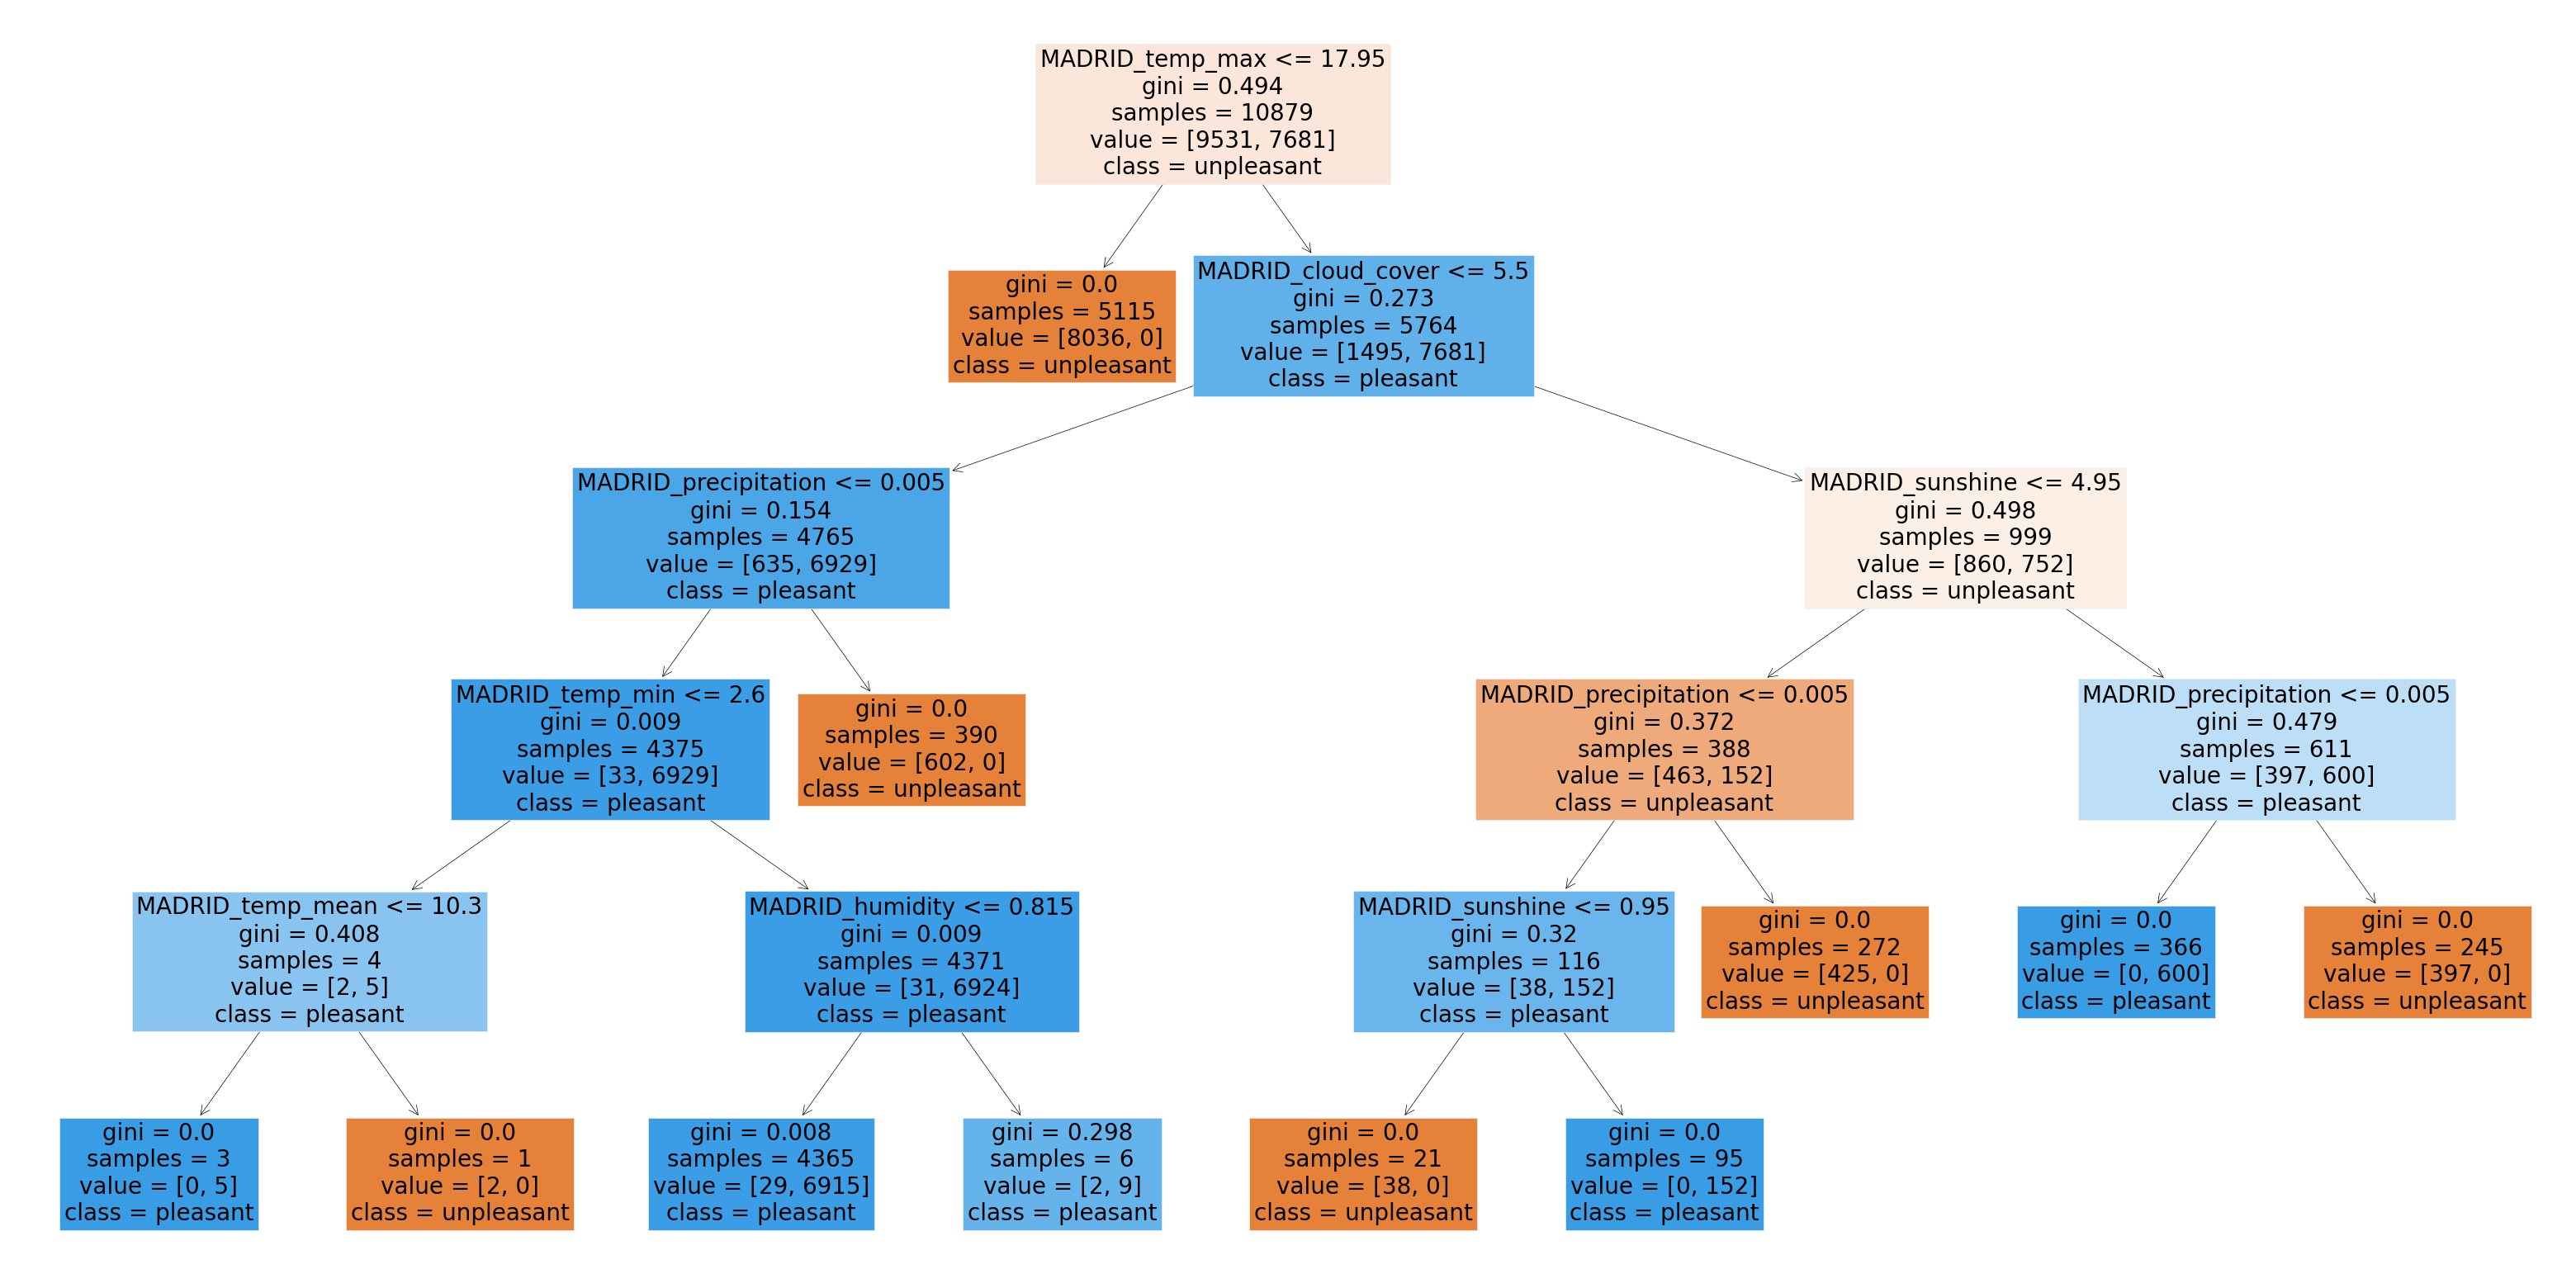

In [85]:
# Plot random forest - Madrid
rf_madrid = plt.figure(figsize=(40,20))
plot_tree(clf_madrid.estimators_[5], fontsize = 20, feature_names=df_madrid.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [93]:
# Save random forest (madrid) visualization
rf_madrid.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'random_forest_madrid.png'),bbox_inches='tight')

## 4.3. Feature Importance - Random Forest (Madrid data)

In [86]:
# Retrieve feature importances from the trained model
feature_importances_madrid = clf_madrid.feature_importances_
print("Feature Importances:", feature_importances_madrid)
print(feature_importances_madrid.shape)

Feature Importances: [0.01241378 0.10997885 0.02599424 0.17800914 0.00206384 0.08360916
 0.3476911  0.1771004  0.06313951]
(9,)


In [88]:
# Create list for observation measurements
measurements = [
    'cloud_cover', 'global_radiation', 'humidity', 'precipitation', 'pressure', 'sunshine','temp_max', 'temp_mean', 'temp_min', 
]

In [89]:
# Create a dataframe to associate observation measurements with their importances
importances_df_madrid = pd.DataFrame({
    'Measurement': measurements,
    'Importance': feature_importances_madrid
})

In [90]:
# Sort by importance for chart readability
importances_df_madrid = importances_df_madrid.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importances_df_madrid)

Feature Importance:
        Measurement  Importance
6          temp_max    0.347691
3     precipitation    0.178009
7         temp_mean    0.177100
1  global_radiation    0.109979
5          sunshine    0.083609
8          temp_min    0.063140
2          humidity    0.025994
0       cloud_cover    0.012414
4          pressure    0.002064


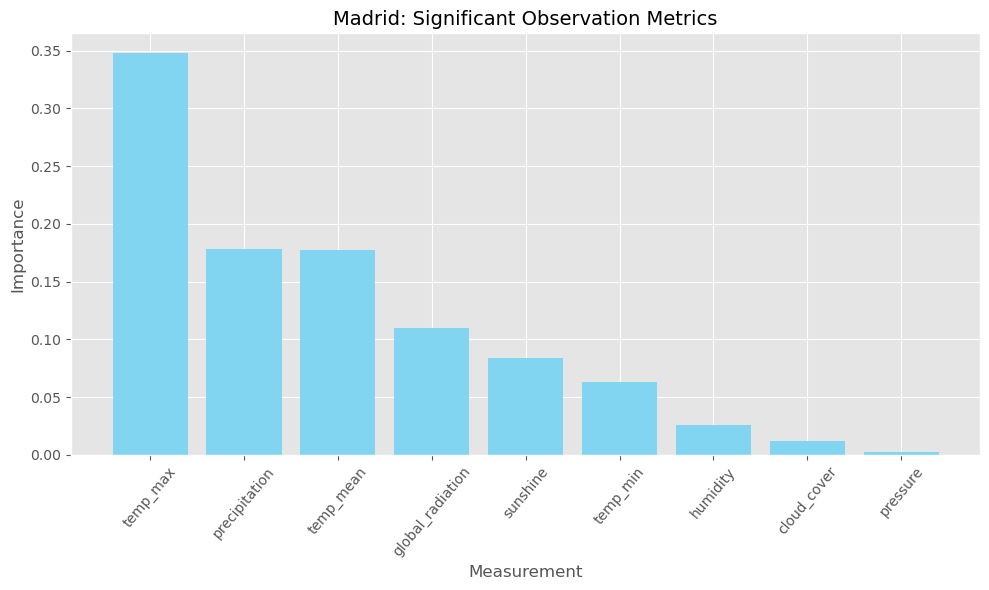

In [94]:
# Plot the importances

plt.style.use('ggplot')
plt_madrid = plt.figure(figsize=(10, 6))
plt.bar(importances_df_madrid['Measurement'], importances_df_madrid['Importance'], color='#81d5f0')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Madrid: Significant Observation Metrics", fontsize=14)
plt.tight_layout()
plt.show();

In [95]:
# Save chart - madrid
plt_madrid.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'feature_importances_madrid.png'),bbox_inches='tight')

## 5.1. Random Forest data prep (Budapest)

In [96]:
# Filter weather dataset to only include Budapest
df_budapest = df_cw_date[df_cw_date.columns[df_cw_date.columns.astype(str).str.startswith('BUDAPEST')]]
df_budapest

BUDAPEST_cloud_cover  BUDAPEST_global_radiation  BUDAPEST_humidity  \
0                         4                       0.44               0.67   
1                         4                       0.18               0.67   
2                         4                       0.30               0.67   
3                         4                       0.19               0.67   
4                         4                       0.19               0.67   
...                     ...                        ...                ...   
22945                     4                       1.41               0.67   
22946                     4                       1.41               0.67   
22947                     4                       1.41               0.67   
22948                     4                       1.41               0.67   
22949                     4                       1.41               0.67   

       BUDAPEST_precipitation  BUDAPEST_pressure  BUDAPEST_sunshine  \
0                        0.01              1.017                2.3   
1                        0.31              1.017                0.0   
2                        0.00              1.017                0.6   
3                        0.00              1.017                0.0   
4                        0.00              1.017                0.0   
...                       ...                ...                ...   
22945                    0.14              1.017                5.4   
22946                    0.14              1.017                5.4   
22947                    0.14              1.017                5.4   
22948                    0.14              1.017                5.4   
22949                    0.14              1.017                5.4   

       BUDAPEST_temp_max  BUDAPEST_temp_mean  BUDAPEST_temp_min  
0                    5.1                 2.4               -0.4  
1                    3.1                 2.3                1.4  
2                    5.3                 2.7                1.7  
3                    4.4                 2.0                0.4  
4                    5.3                 2.5                1.1  
...                  ...                 ...                ...  
22945               16.2                11.7                7.9  
22946               16.2                11.7                7.9  
22947               16.2                11.7                7.9  
22948               16.2                11.7                7.9  
22949               16.2                11.7                7.9  

[22950 rows x 9 columns]

In [97]:
# Filter prediction dataset to only include Budapest
df_pred_budapest = df_cw_pred[df_cw_pred.columns[df_cw_pred.columns.astype(str).str.startswith('BUDAPEST')]]
df_pred_budapest

BUDAPEST_pleasant_weather
0                              0
1                              0
2                              0
3                              0
4                              0
...                          ...
22945                          0
22946                          0
22947                          0
22948                          0
22949                          0

[22950 rows x 1 columns]

In [98]:
# Check shape
print(df_budapest.shape)
print(df_pred_budapest.shape)

(22950, 9)
(22950, 1)


In [99]:
# Create matrices
y_2 = df_pred_budapest.max(axis=1)

# Check shape
print("Shape of y_2_combined:", y_2.shape)

Shape of y_2_combined: (22950,)


In [100]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_2_combined:", y_2.unique())

Unique values in y_2_combined: [0 1]


In [101]:
# Ensure y has the correct shape
y_2 = y_2.to_numpy().reshape(-1)

# Check shape
print(y_2.shape)

(22950,)


In [102]:
# Create X matrix
X_2 = df_budapest.to_numpy()

In [103]:
# Check shapes of the matrices
print(X_2.shape)
print(y_2.shape)

(22950, 9)
(22950,)


In [104]:
# Split data into training and testing sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, random_state=42)

# Check shapes
print(X_train_2.shape, y_train_2.shape)
print(X_test_2.shape, y_test_2.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


## 5.2. Random Forest (Budapest data)

In [105]:
# Creating a Random Forest classifier
clf_budapest = RandomForestClassifier(n_estimators = 100, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_budapest.fit(X_train_2, y_train_2)

RandomForestClassifier(max_depth=5)

In [106]:
# Perform the predictions on the test dataset
y_pred_2 = clf_budapest.predict(X_test_2)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_2, y_pred_2))

Model Accuracy:  1.0


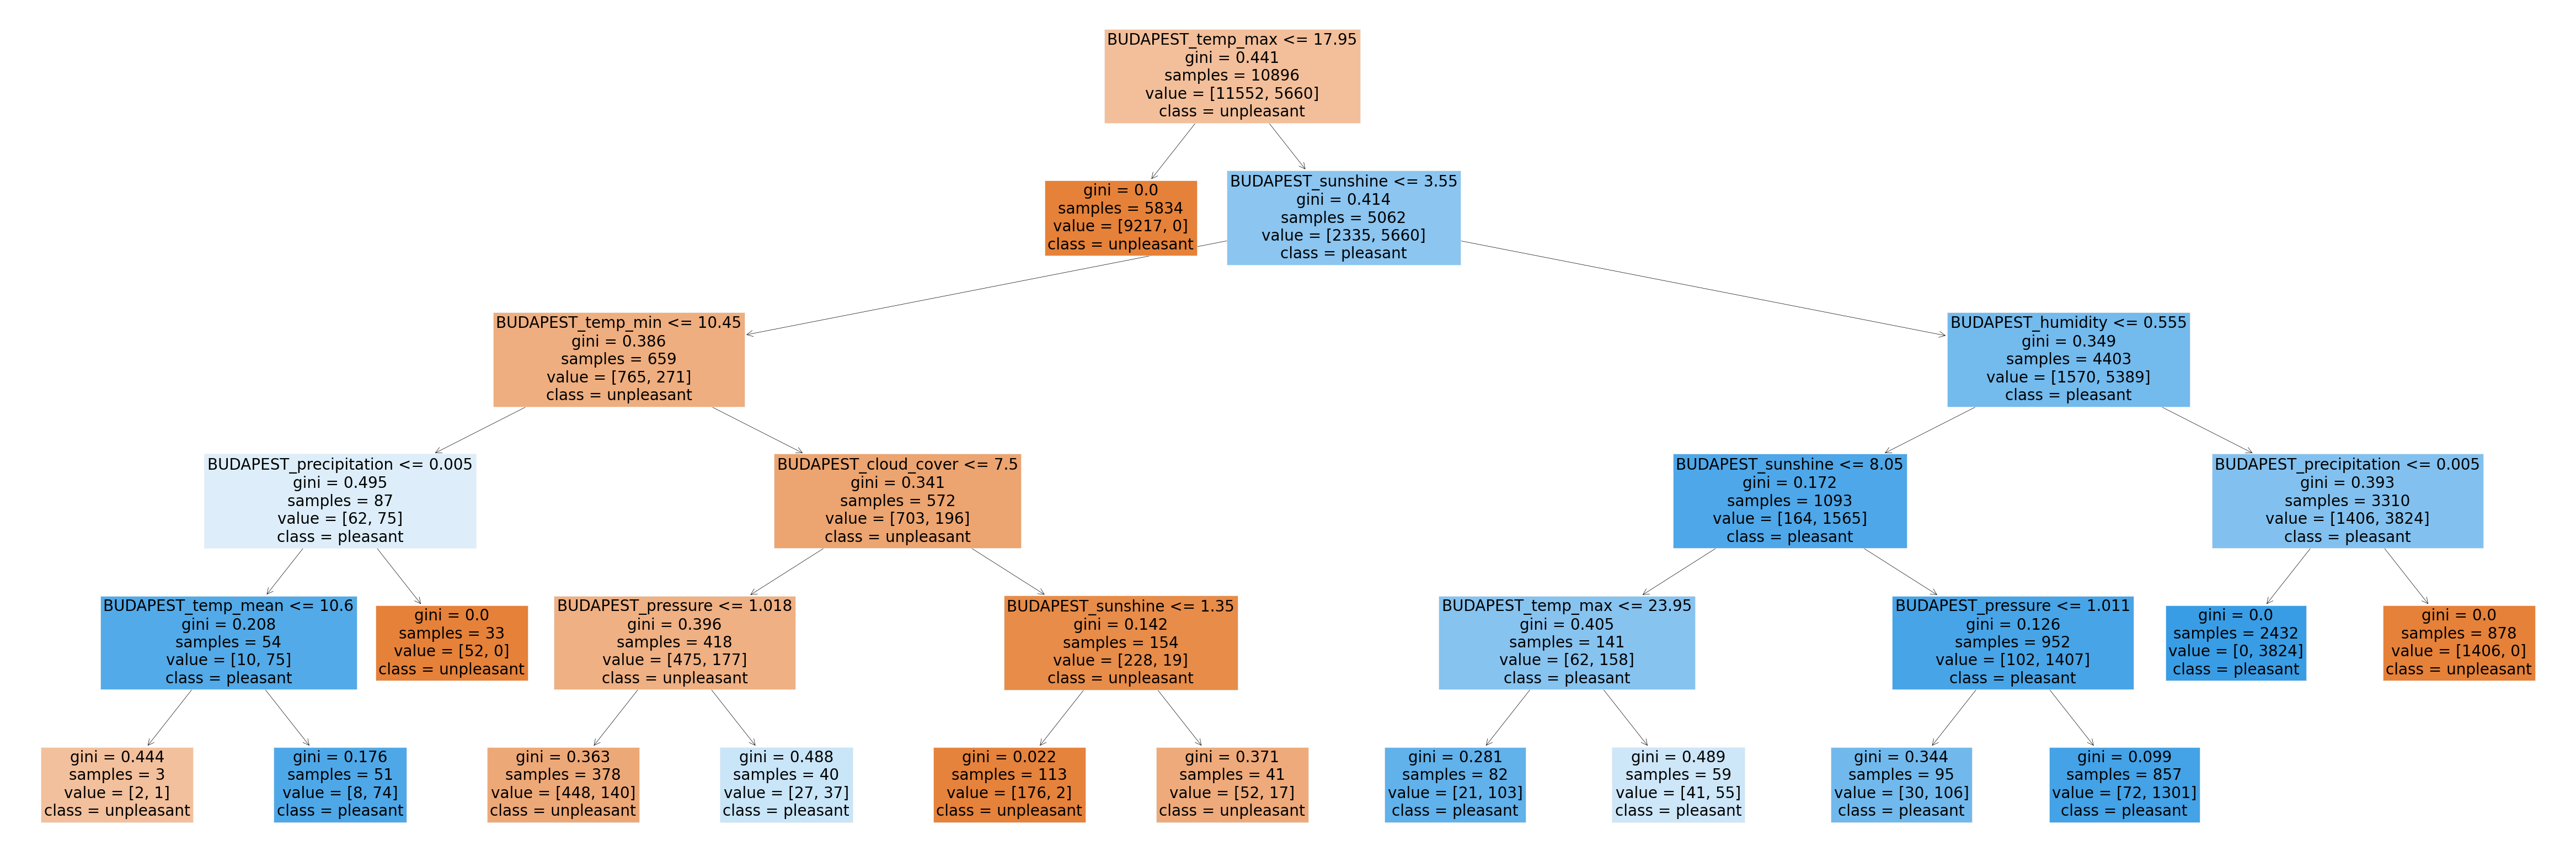

In [110]:
# Plot random forest (Madrid)
rf_budapest = plt.figure(figsize=(60,20))
plot_tree(clf_budapest.estimators_[5], fontsize = 20, feature_names=df_budapest.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [111]:
# Export the plot
rf_budapest.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'random_forest_budapest.png'),bbox_inches='tight')

## 5.3. Feature Importance - Random Forest (Budapest data)

In [112]:
# Retrieve feature importances from the trained model
feature_importances_budapest = clf_budapest.feature_importances_
print("Feature Importances:", feature_importances_budapest)
print(feature_importances_budapest.shape)

Feature Importances: [0.0162519  0.05829683 0.00366575 0.31297259 0.0037088  0.0569277
 0.27786749 0.19657781 0.07373113]
(9,)


In [113]:
# Create a dataframe to associate observation measurements with their importances
importances_df_budapest = pd.DataFrame({
    'Measurement': measurements,
    'Importance': feature_importances_budapest
})

In [114]:
# Sort by importance for chart readability
importances_df_budapest = importances_df_budapest.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importances_df_budapest)

Feature Importance:
        Measurement  Importance
3     precipitation    0.312973
6          temp_max    0.277867
7         temp_mean    0.196578
8          temp_min    0.073731
1  global_radiation    0.058297
5          sunshine    0.056928
0       cloud_cover    0.016252
4          pressure    0.003709
2          humidity    0.003666


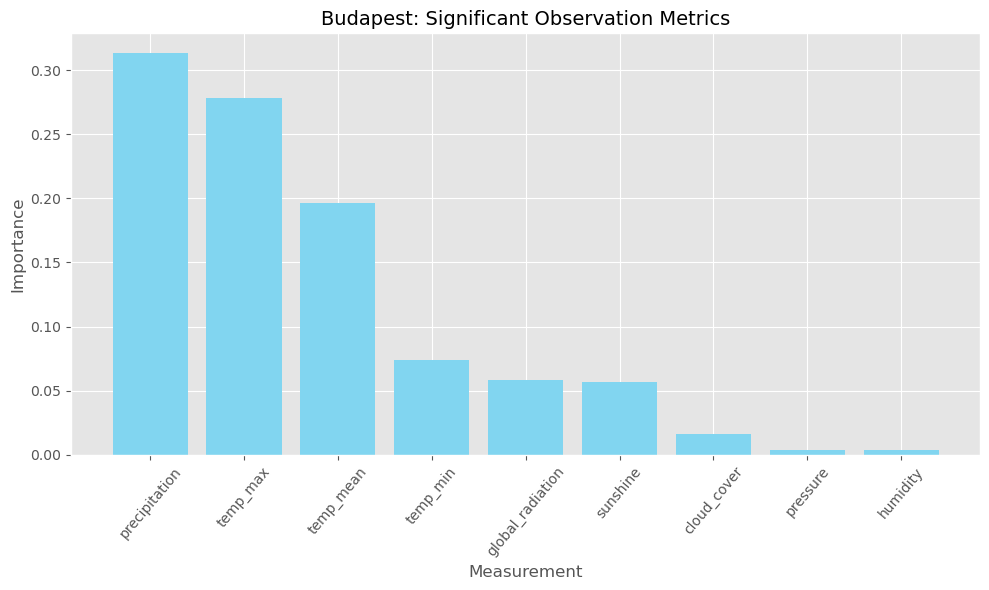

In [115]:
# Plot the importances

plt.style.use('ggplot')
plt_budapest = plt.figure(figsize=(10, 6))
plt.bar(importances_df_budapest['Measurement'], importances_df_budapest['Importance'], color='#81d5f0')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Budapest: Significant Observation Metrics", fontsize=14)
plt.tight_layout()
plt.show();

In [116]:
# Save chart - budapest
plt_budapest.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'feature_importances_budapest.png'),bbox_inches='tight')

## 6.1. Random Forest data prep (Ljubljana)

In [117]:
# Filter weather dataset to only include Ljubljana
df_ljubljana = df_cw_date[df_cw_date.columns[df_cw_date.columns.astype(str).str.startswith('LJUBLJANA')]]
df_ljubljana

LJUBLJANA_cloud_cover  LJUBLJANA_global_radiation  LJUBLJANA_humidity  \
0                          8                        0.20                1.00   
1                          6                        0.56                0.94   
2                          8                        0.20                0.96   
3                          6                        0.49                0.94   
4                          7                        0.20                0.94   
...                      ...                         ...                 ...   
22945                      4                        1.35                0.80   
22946                      3                        1.35                0.82   
22947                      3                        1.35                0.81   
22948                      3                        1.35                0.77   
22949                      3                        1.35                0.77   

       LJUBLJANA_precipitation  LJUBLJANA_pressure  LJUBLJANA_sunshine  \
0                         0.00              1.0173                 0.0   
1                         0.13              1.0173                 3.2   
2                         0.12              1.0173                 0.0   
3                         0.00              1.0173                 2.2   
4                         0.00              1.0173                 0.0   
...                        ...                 ...                 ...   
22945                     0.37              1.0289                 5.9   
22946                     0.37              1.0291                 4.5   
22947                     0.37              1.0270                 5.1   
22948                     0.37              1.0238                 5.7   
22949                     0.37              1.0114                 6.3   

       LJUBLJANA_temp_max  LJUBLJANA_temp_mean  LJUBLJANA_temp_min  
0                     0.5                 -0.6                -1.9  
1                     5.5                  2.1                -1.3  
2                     6.3                  4.6                 0.9  
3                     7.0                  3.2                 1.0  
4                     4.8                  3.6                 0.4  
...                   ...                  ...                 ...  
22945                21.1                 14.7                12.1  
22946                19.8                 12.9                 9.8  
22947                20.7                 13.2                10.2  
22948                23.1                 14.0                10.0  
22949                23.4                 13.6                 8.8  

[22950 rows x 9 columns]

In [118]:
# Filter prediction dataset to only include Ljubljana
df_pred_ljubljana = df_cw_pred[df_cw_pred.columns[df_cw_pred.columns.astype(str).str.startswith('LJUBLJANA')]]
df_pred_ljubljana

LJUBLJANA_pleasant_weather
0                               0
1                               0
2                               0
3                               0
4                               0
...                           ...
22945                           0
22946                           0
22947                           0
22948                           0
22949                           0

[22950 rows x 1 columns]

In [119]:
# Check shape
print(df_ljubljana.shape)
print(df_pred_ljubljana.shape)

(22950, 9)
(22950, 1)


In [121]:
# Create matrices
y_3 = df_pred_ljubljana.max(axis=1)

# Check shape
print("Shape of y_3_combined:", y_3.shape)

Shape of y_3_combined: (22950,)


In [122]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_3_combined:", y_3.unique())

Unique values in y_3_combined: [0 1]


In [123]:
# Ensure y has the correct shape
y_3 = y_3.to_numpy().reshape(-1)

# Check shape
print(y_3.shape)

(22950,)


In [124]:
# Create X matrix
X_3 = df_ljubljana.to_numpy()

In [125]:
# Check shapes of the matrices
print(X_3.shape)
print(y_3.shape)

(22950, 9)
(22950,)


In [126]:
# Split data into training and testing sets
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, random_state=42)

# Check shapes
print(X_train_3.shape, y_train_3.shape)
print(X_test_3.shape, y_test_3.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


## 6.2. Random Forest (Ljubljana data)

In [127]:
# Creating a Random Forest classifier
clf_ljubljana = RandomForestClassifier(n_estimators = 100, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_ljubljana.fit(X_train_3, y_train_3)

RandomForestClassifier(max_depth=5)

In [128]:
# Perform the predictions on the test dataset
y_pred_3 = clf_ljubljana.predict(X_test_3)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_3, y_pred_3))

Model Accuracy:  1.0


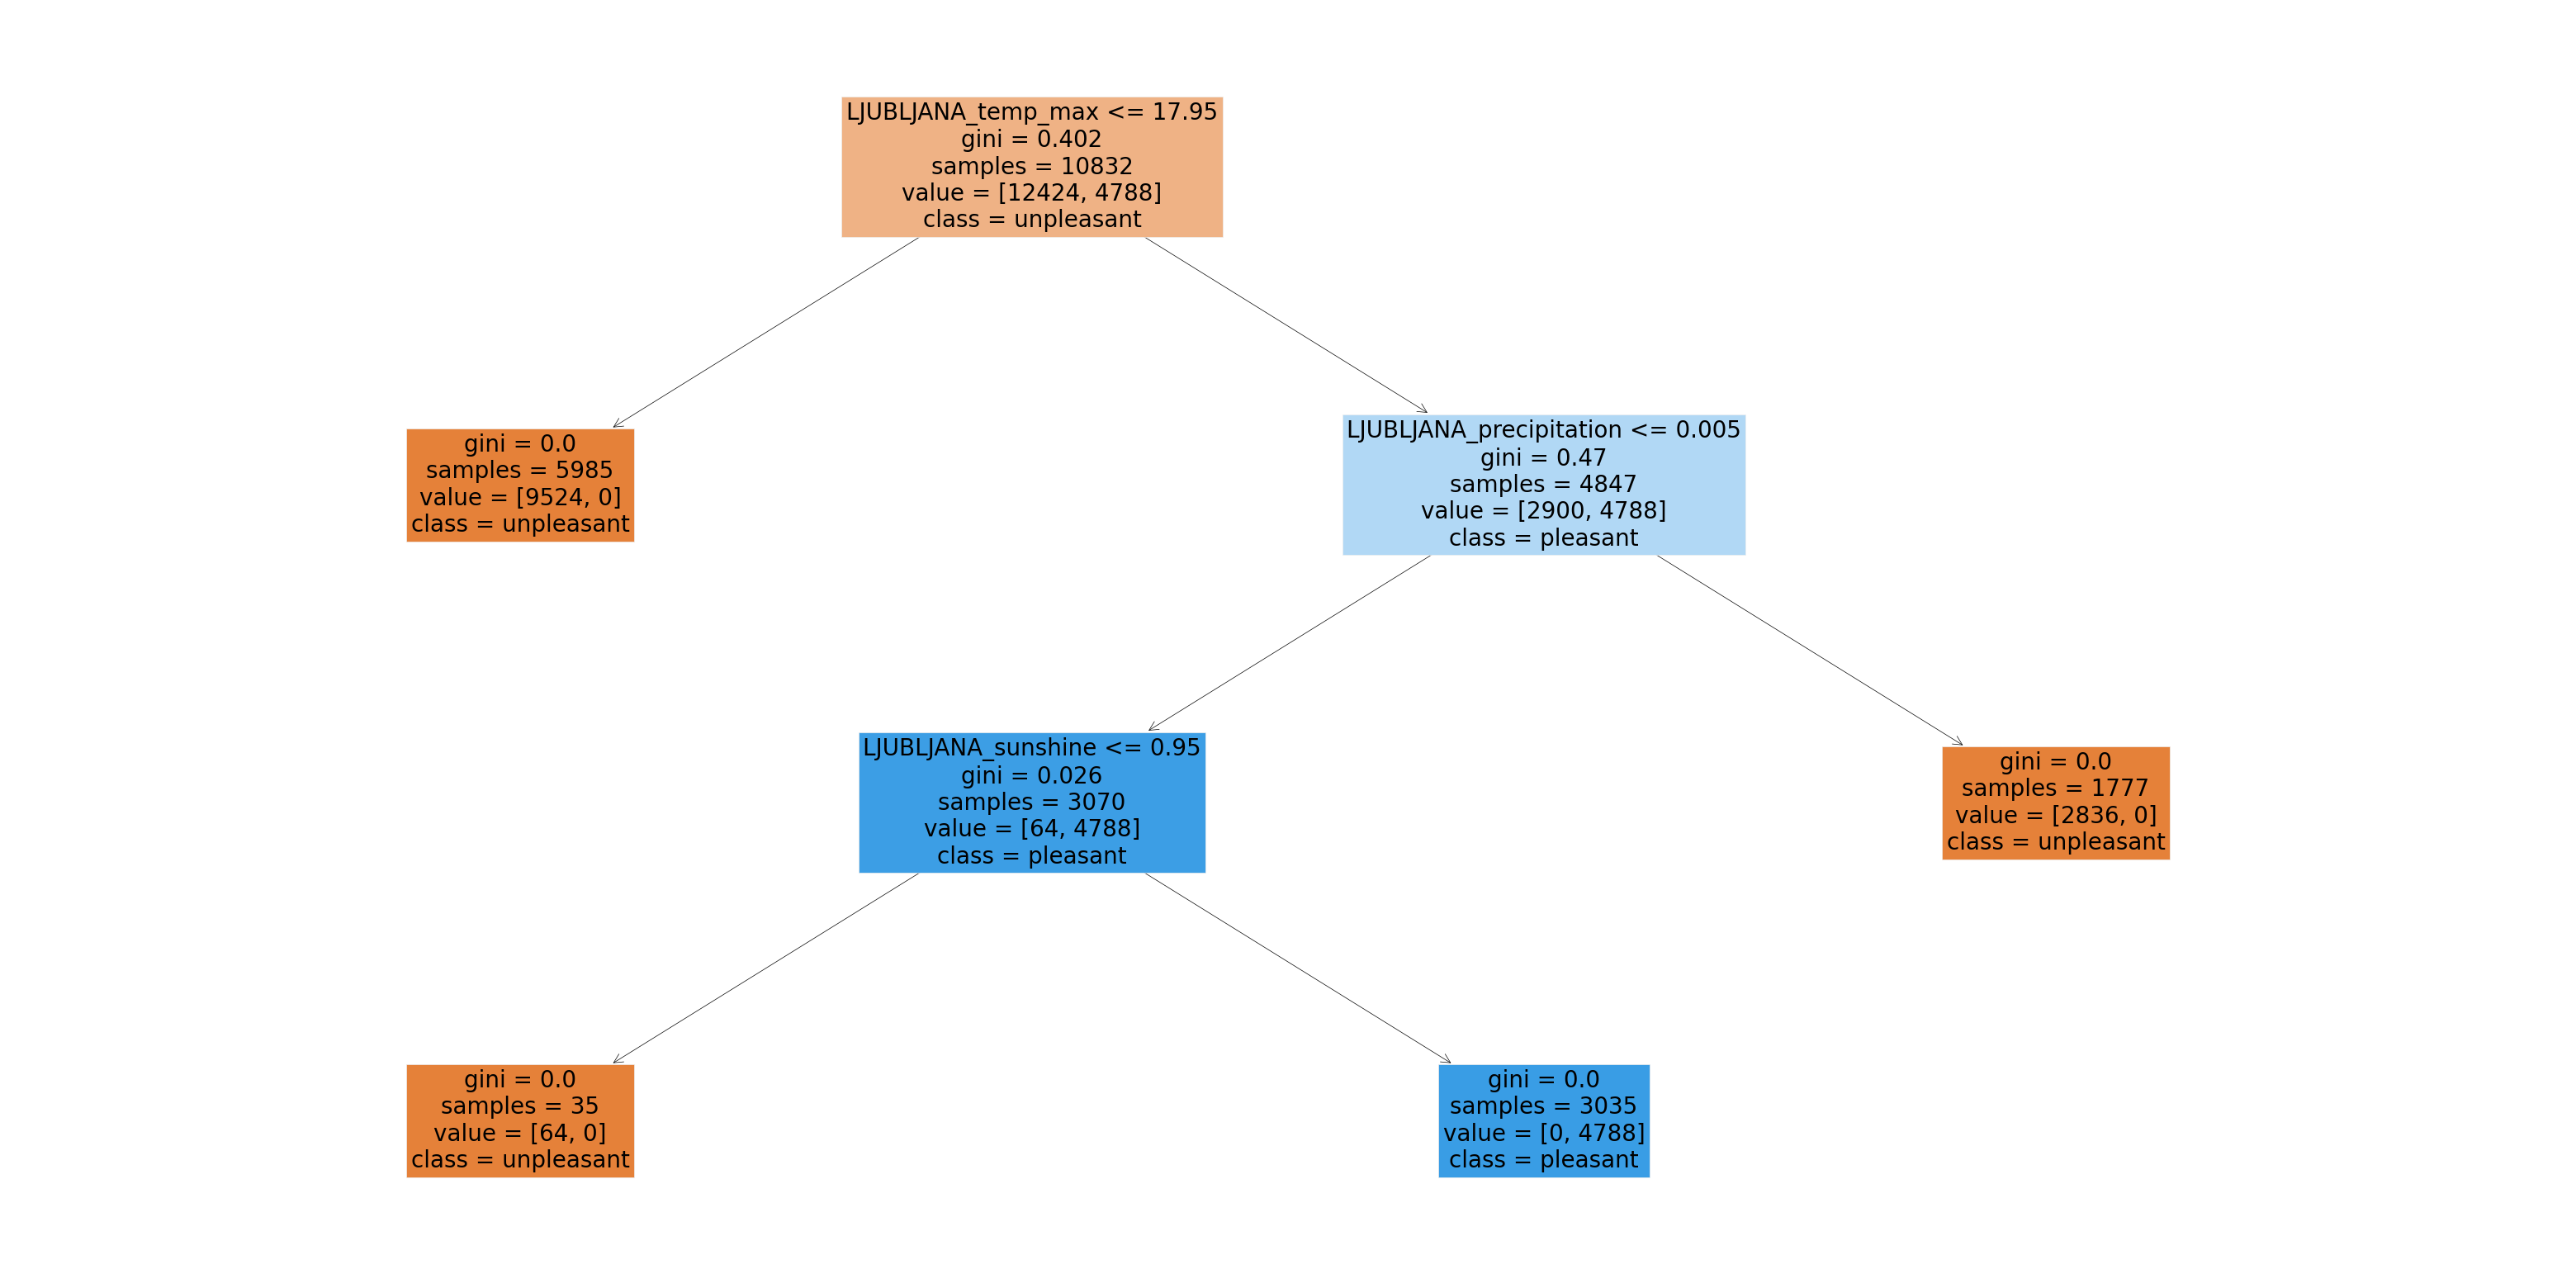

In [129]:
# Plot random forest - Ljubljana
rf_ljubljana = plt.figure(figsize=(40,20))
plot_tree(clf_ljubljana.estimators_[5], fontsize = 20, feature_names=df_ljubljana.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [130]:
# Export plot
rf_ljubljana.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'random_forest_ljubljana.png'),bbox_inches='tight')

## 6.3. Feature Importance - Random Forest (Ljubljana data)

In [131]:
# Retrieve feature importances from the trained model
feature_importances_ljubljana = clf_ljubljana.feature_importances_
print("Feature Importances:", feature_importances_ljubljana)
print(feature_importances_ljubljana.shape)

Feature Importances: [0.05146269 0.10134722 0.01254028 0.3188912  0.00712168 0.07860853
 0.30122475 0.1103657  0.01843795]
(9,)


In [132]:
# Create a dataframe to associate observation measurements with their importances
importances_df_ljubljana = pd.DataFrame({
    'Measurement': measurements,
    'Importance': feature_importances_ljubljana
})

In [133]:
# Sort by importance for chart readability
importances_df_ljubljana= importances_df_ljubljana.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importances_df_ljubljana)

Feature Importance:
        Measurement  Importance
3     precipitation    0.318891
6          temp_max    0.301225
7         temp_mean    0.110366
1  global_radiation    0.101347
5          sunshine    0.078609
0       cloud_cover    0.051463
8          temp_min    0.018438
2          humidity    0.012540
4          pressure    0.007122


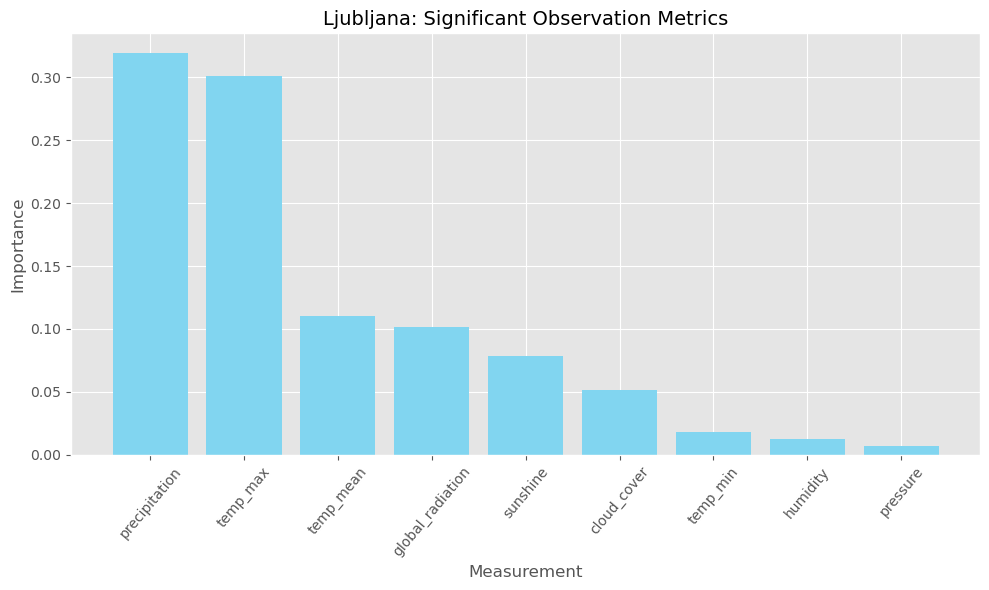

In [135]:
# Plot the importances

plt.style.use('ggplot')
plt_ljubljana = plt.figure(figsize=(10, 6))
plt.bar(importances_df_ljubljana['Measurement'], importances_df_ljubljana['Importance'], color='#81d5f0')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Ljubljana: Significant Observation Metrics", fontsize=14)
plt.tight_layout()
plt.show();

In [136]:
# Save chart - ljubljana
plt_ljubljana.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'feature_importances_ljubljana.png'),bbox_inches='tight')